## Basic Neural Network Model: Predict Housing Price

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

<p align='center'>
  <img src='https://d1e00ek4ebabms.cloudfront.net/production/bc077356-7727-449a-8656-3e74b33fa65e.jpg' width=600></img>
</p>

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
- LSTAT - \% lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

Research Question: What is the price of a house given its information about the above features? In other words, can we build a model to learn from the features of the house to predict the housing price?

In [ ]:
# import 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# get data
train_path = '/content/sample_data/california_housing_train.csv'
test_path = '/content/sample_data/california_housing_test.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
# display shape
train.shape, test.shape

((17000, 9), (3000, 9))

In [ ]:
# head
train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [ ]:
# define X and y
X_train = train.iloc[:, train.columns!='median_house_value']
y_train = train['median_house_value']
X_test = test.iloc[:, test.columns!='median_house_value']
y_test = test['median_house_value']

In [ ]:
# display shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17000, 8), (17000,), (3000, 8), (3000,))

In [ ]:
# import
import tensorflow as tf

In [ ]:
# define a neural network model
model = tf.keras.models.Sequential(name='this_model')
model.add(tf.keras.layers.Dense(1, input_shape=[8]))
model.summary()

Model: "this_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile
model.compile(optimizer='rmsprop', loss='mae')

In [ ]:
# fit
model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
425/425 [==============================] - 1s 2ms/step - loss: 198028.7188 - val_loss: 245978.1875
Epoch 2/10
425/425 [==============================] - 1s 2ms/step - loss: 195744.5469 - val_loss: 243928.7031
Epoch 3/10
425/425 [==============================] - 1s 2ms/step - loss: 193476.4062 - val_loss: 241877.4219
Epoch 4/10
425/425 [==============================] - 1s 2ms/step - loss: 191212.0156 - val_loss: 239827.8281
Epoch 5/10
425/425 [==============================] - 1s 1ms/step - loss: 188929.2500 - val_loss: 237776.7188
Epoch 6/10
425/425 [==============================] - 1s 2ms/step - loss: 186659.8750 - val_loss: 235724.3594
Epoch 7/10
425/425 [==============================] - 1s 2ms/step - loss: 184401.6562 - val_loss: 233680.3750
Epoch 8/10
425/425 [==============================] - 1s 1ms/step - loss: 182154.5000 - val_loss: 231629.8594
Epoch 9/10
425/425 [==============================] - 1s 2ms/step - loss: 179893.5938 - val_loss: 229578.7031
Epoch 10/1

In [ ]:
# predict on test set
y_test_pred_ = model.predict(X_test)
len(y_test_pred_), len(y_test)

(3000, 3000)

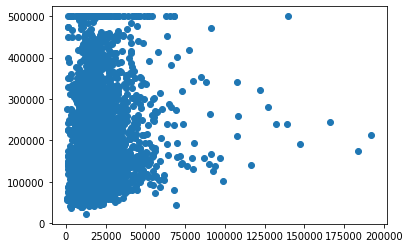

In [ ]:
# visualize
plt.scatter(y_test_pred_, y_test)

In [ ]:
# how accurate?
# step 1: take the difference
y_test_pred_.reshape((-1)) - np.asarray(y_test)

array([-318169.40039062, -164377.99902344, -246356.84179688, ...,
        -53136.82617188, -161013.94262695, -487427.22558594])

In [ ]:
# step 2: take the absolute value of the difference
np.abs(y_test_pred_.reshape((-1)) - np.asarray(y_test))

array([318169.40039062, 164377.99902344, 246356.84179688, ...,
        53136.82617188, 161013.94262695, 487427.22558594])

In [ ]:
# sttep 3: take the average of the absolute difference
np.mean(np.abs(y_test_pred_.reshape((-1)) - np.asarray(y_test)))

185564.7691495768

Question: 
- How do you interpret this number?
- Why can't we compute accuracy but we have to use errors to measure how "accurate" our model is?

# MNIST Data

According to Yann LeCun on this [site](http://yann.lecun.com/exdb/mnist/#:~:text=It%20is%20a%20good%20database,efforts%20on%20preprocessing%20and%20formatting.), the MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

<p align="center">
    <img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1"></img>
</p>

## Research Question

Can AI recognize pictures?

## Agenda

This is the standrad image data for developing neural network models and convolutional neural network models. 

- Neural Networks (1st meeting)
- Convolutional Neural Networks (2nd meeting)

One you have the basic knowledge, there two tasks:
- First, you build a model to make good predictions on MNIST dataset
- Next, you will get a new data set that is similar and you will build advanced models to make good predictions on it. Plan: We use the MNIST Fashion dataset.

Goal: To develop state-of-the-art CNN models.

## Notes

Most of the notes are taken using markdown area. To learn more diverse editting techniques for you to take quick notes using markdown, please click [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

# Artificial Neural Networks

## Load Data

In [ ]:
# import library
import tensorflow as tf

In [ ]:
# use tf API to get data
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(training_images.shape)
print(training_images[0].shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(28, 28)


In [ ]:
# display dimension
training_images.shape, training_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Save Using Pickle

Sometimes the data you loaded is extremely large in sizes so we use pickle file to dump your data inside. This is to prevent that you lose the memory and record. The way to do this is whenever you run a chunk of cell with large memory you want to make sure have a pickle file ready to dump your data inside.

In [ ]:
# import
import os
import pickle

In [ ]:
# list directory
os.listdir()

['.config', 'sample_data']

In [ ]:
# dump: this means save the desired file into a pickle file
# note: a pickle file is a file ends with .pkl format
a = (training_images, training_labels), (test_images, test_labels)
with open('mnist_data.pkl', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# check if it exists in the current directory
os.listdir()

['.config', 'mnist_data.pkl', 'sample_data']

In [ ]:
# load: this means start loading the desired file from the pickle file
# note: this means that you do a with-open clause, and grab whatever 
#       inside of the .pkl file and defined it as a new object
#       please make sure the name and the directory are correct
with open('mnist_data.pkl', 'rb') as handle:
    b = pickle.load(handle)

# preview
type(b), len(b)

(tuple, 2)

In [ ]:
# what is b?
print(b[0][0].shape, b[0][1].shape, b[1][0].shape, b[1][1].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


The dimension says 60,000 by 28 by 28. This means the dataset has 60,000 images. Each image has 28 rows and 28 columns of pixels.

In [ ]:
'test_test'.split('_')

['test', 'test']

In [ ]:
# library
import matplotlib.pyplot as plt

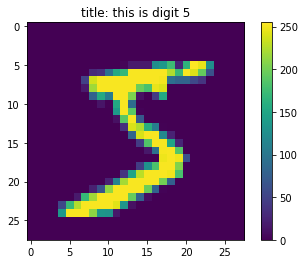

In [ ]:
# plot one sample
plt.imshow(training_images[0])
plt.title('title: this is digit ' + str(training_labels[0]))
plt.colorbar()

In [ ]:
# library
import numpy as np

In [ ]:
# unique digits
np.unique(training_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# display shape
training_labels.shape

(60000,)

### One hot encode

We need to use *to_categorical* function to do one-hot encode. The operation of one-hot encode will check each unique level of the data and create a new binary vector for that level.

For example, the vector below has 3 levels: 1, 3, 4. Hence, for each level (for each of the value 1, 3, 4), there will be a new vector created that only takes values 1 or 0.

$$
\begin{bmatrix}
1 \\
3 \\
1 \\
4 \\
\end{bmatrix}
\rightarrow_\text{one hot}
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
1 & 0 & 0\\
0 & 0 & 1\\
\end{bmatrix}
$$

Source is [here](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical).

In [ ]:
# one hot encode
training_labels_one_hot_encoded = tf.keras.utils.to_categorical(training_labels, num_classes=10)
test_labels_one_hot_encoded = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [ ]:
# display shape
print(training_labels_one_hot_encoded.shape)
print(test_labels_one_hot_encoded.shape)

(60000, 10)
(10000, 10)


This means there are 10 classes.

## Process Data

We want the data to be rescaled to between 0 and 1. We know that the pixel values can range from 0 to 255. To do this, we divide all pixels by 255.

The purpose is to avoid the error blowing up. 

In [ ]:
# check max and min
np.max(training_images), np.min(training_images)

(255, 0)

In [ ]:
(255-100)*28*28

121520

In [ ]:
# rescale
training_images = training_images / 255
test_images = test_images / 255

In [ ]:
# check max and min
np.max(training_images), np.min(training_images)

(1.0, 0.0)

## Activation Functions

An Activation Function decides whether a neuron should be activated or not. This means that it will decide whether the neuron's input to the network is important or not in the process of prediction using simpler mathematical operations.

<p align='center'>
    <img src="https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png" width=700></img>
</p>

Why use activation function? It is because we need to have non-linear component in each neuron.

## Softmax Function

The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

<p align='center'>
    <img src="https://miro.medium.com/max/805/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg" width=500, height=300></img>
</p>

## Regularization

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it.

<p align='center'>
    <img src="https://miro.medium.com/proxy/1*mh-QVwSKbe2kYCBh9mwA0Q.png" width=600 height=380></img>
</p>

If you are using L1 (this is the square one on the left), you are more likely to have sparse results (this means some of your weights are zeros). 

### Question: Is this good or bad?

It depends. If you want to avoid overfitting way more than you do, use L1. If you don't really care about it, you can use L2. 

## Build an Artificial Neural Network

In [ ]:
# use sequential api to build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), # neural network requires the input layer to be a vector instead of 2D array
    ## Your Changes Start Here ##
    # Things to change:
    # number of hidden layers
    # number of neurons per hidden layer
    # the activation functions: Please refer this website: https://keras.io/api/layers/activations/
    # the kernel_regularizer: Please refer this website: https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer
    tf.keras.layers.Dense(1024, activation='relu', use_bias=True), # input units (usually starts with 128) and activation (it's a choice, usually relu)
    tf.keras.layers.Dense(512, activation='relu', use_bias=True), # create more hidden layer if desired
    tf.keras.layers.Dense(64, activation='relu', use_bias=True), # create more hidden layer if desired
    # ... you can have however many you want
    ## Your Changes Ends Here ##
    tf.keras.layers.Dense(10, activation='softmax') # output layer or end layer | you have to match the number of classes
])

In [ ]:
(100+25)/2

62.5

### Loss Function: MSE

What is a loss function? A loss function helps you to identify how many mistakes the model is making. The most common one (originated from linear regression) is L2 loss or also known as the square loss. This loss function is written below

$$\mathcal{L}(Y, \hat{Y}) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

where the $Y$ is ground truth at a vector level and the $\hat{Y}$ is the educated guess or estimate from the model at a vector level. The left hand side of the formula is defined by the right hand side which means that the vectors can be expanded using sub-index $i$. This sub-index $i$ is a running index indicating which sample the function is referring to. For example, let us take a look at the baby version below.

For example, suppose we have a few data points below. Denote $y_i - \hat{y}_i$ as "diff" for short hand nickname. Then the table below walks you through how to execute the above formula mathematically.

| $i$ | $y_i$ | $\hat{y}_i$ | $\text{diff}$ | $\text{diff}^2$ |
| --- | --- | --- | --- | --- |
| 1  |  10  |  20  | -10  | 100  |
| 2  |  10  |  5  | 5  | 25  |

If you watch carefully, the formula is essentially $\text{something}^2$ (we read "something square" or "square of something"), this means that it is a [convex function](https://en.wikipedia.org/wiki/Convex_function). Hence, there always exists an optimal point!!!

### Loss Function: BCE

If you are training a binary classifier, chances are you are using binary cross-entropy / log loss as your loss function. Loss Function: Binary Cross-Entropy / Log Loss takes the following form

$$\mathcal{L}(y, \hat{y}) = -\frac{1}{n} \sum_{i=1}^n y_i \log(\hat{y}_i) + (1 - y_i) \log (\hat{y}_i)$$

where $y$ is the label and $\hat{y}$ is the predicted probability of the data point for all $n$ points.

The plot below gives us a clear picture —as the predicted probability of the true class gets closer to zero, the loss increases exponentially:

<p align='center'><img src='https://miro.medium.com/max/836/1*T8KWtAn8FkAcsg8RsjiZ6Q.png' width=500></img></p>

Consider the following scenarios:
- If predicted probabilities $\hat{y}_i$ is small (close to 0) and truth $y_i = 0$, what happens?
- If predicted probabilities $\hat{y}_i$ is small (close to 0) and truth $y_i = 1$, what happens?
- If predicted probabilities $\hat{y}_i$ is large (close to 1) and truth $y_i = 0$, what happens?
- If predicted probabilities $\hat{y}_i$ is large (close to 0) and truth $y_i = 1$, what happens?

A good paper to refer to is [here](https://www.semanticscholar.org/paper/On-Loss-Functions-for-Deep-Neural-Networks-in-Janocha-Czarnecki/d589392ab606a3d2861988ebcba95176517939ec).

<p align='center'>
    <img src="https://d3i71xaburhd42.cloudfront.net/d589392ab606a3d2861988ebcba95176517939ec/2-Table1-1.png" width=500></img>
</p>

### Optimization

An optimizer is an algorithm to search for the most optimal (some minimum value) on a loss surface. Recall the loss surface is how many mistakes the model is making, so it is intuitive that the desired point (the optimal point) is where the loss is small. The location where the loss is small is the "best" parameters we need in our model.

<p align='center'>
    <img src="https://miro.medium.com/max/1400/1*47skUygd3tWf3yB9A10QHg.gif" width=400></img>
</p>

- Animation of gradient descent is [here](https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c)
- Other animation can be found [here](https://towardsai.net/p/machine-learning/analysis-of-learning-rate-in-gradient-descent-algorithm-using-python)

Today, there are many different upgrades of optimization algorithm. Please see below:

<p align='center'>
    <img src="https://user-images.githubusercontent.com/11681225/49325458-fc785480-f585-11e8-8d2a-9012d6024c6e.gif" width=400></img>
</p>

Source of this animation is [here](https://github.com/ilguyi/optimizers.numpy).

In [ ]:
# compile
model.compile(
    ## Your Changes Start Here ##
    # optimizer: https://keras.io/api/optimizers/
    # loss: https://keras.io/api/losses/
    optimizer="adam",
    loss="categorical_crossentropy",
    ## Your Changes Ends Here ##
    metrics=['accuracy']
)

## Train on GPU

When you train on GPU, make sure go to "Edit" then go to "Notebook Setting" and set GPU first.

In [ ]:
# check gpu
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# callbacks
callbacks = [ tf.keras.callbacks.ModelCheckpoint("some_sample_nn_model.h5", save_best_only=True) ]

In [ ]:
import os
os.listdir()

['.config', 'sample_data']

In [ ]:
%%time
# fit | we train the model here
# use GPU
# with tf.device('/device:GPU:0'):
#     history = model.fit(
#         training_images, training_labels_one_hot_encoded,
#         validation_split=0.2,
#         ## Your Changes Start Here ##
#         # there is a sweet spot, you don't want to overfit, but you also want to make sure your model learned something
#         epochs=10
#         ## Your Changes Ends Here ##
#     )

# # use CPU
history = model.fit(
        training_images, # chromagram
        training_labels_one_hot_encoded, # label <= create yourself (it's just a vector of 1's and 0's)
        validation_split=0.2,
        ## Your Changes Start Here ##
        # there is a sweet spot, you don't want to overfit, but you also want to make sure your model learned something
        epochs=10,
        ## Your Changes Ends Here ##
        callbacks=callbacks
    )

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2084 - accuracy: 0.9363 - val_loss: 0.1109 - val_accuracy: 0.9674
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0926 - accuracy: 0.9716 - val_loss: 0.1283 - val_accuracy: 0.9614
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0645 - accuracy: 0.9808 - val_loss: 0.0981 - val_accuracy: 0.9715
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.0902 - val_accuracy: 0.9752
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0415 - accuracy: 0.9879 - val_loss: 0.0901 - val_accuracy: 0.9748
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.0960 - val_accuracy: 0.9766
Epoch 7/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.1163 - val_ac

### Save

You have done all the work to train the model. In practice, it can be thousands of epochs and many lines of code. You do not want to lose this model! We will use tensorflow to save and load the model below.

```
# save
model.save('enter_your_desired_path.h5')

# load
new_model = tf.keras.models.load_model('enter_your_desired_path.h5')
```

In [ ]:
# save model: it must be .h5 format
model.save('your_neuralnet_model.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('your_neuralnet_model.h5')

In [ ]:
# check
model.summary() == new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 1024)                803840    
                                                                 
 dense_1 (Dense)             (32, 512)                 524800    
                                                                 
 dense_2 (Dense)             (32, 64)                  32832     
                                                                 
 dense_3 (Dense)             (32, 10)                  650       
                                                                 
Total params: 1,362,122
Trainable params: 1,362,122
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
__________________________

True

### Evaluation

In [ ]:
# quick evaluation on test set
this_final_loss_, this_final_acc_ = model.evaluate(test_images, test_labels_one_hot_encoded)
print('Test Result: Loss is '+str(this_final_loss_)+', and accuracy is '+str(this_final_acc_))

313/313 [==============================] - 1s 3ms/step - loss: 0.1096 - accuracy: 0.9759
Test Result: Loss is 0.10962232947349548, and accuracy is 0.9758999943733215


## Visualize Performance

Text(0.5, 1.0, 'loss')

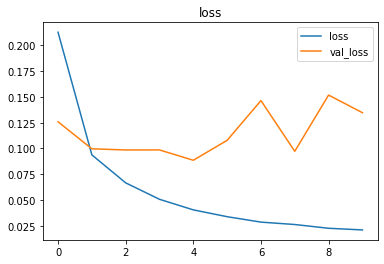

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

In [ ]:
# import
import sklearn.metrics as metrics

In [ ]:
# predict
test_labels_one_hot_encoded_predicted = model.predict(test_images)
test_labels_predicted = np.argmax(test_labels_one_hot_encoded_predicted, axis=1)
print(test_labels.shape)
print(test_labels_predicted.shape)

(10000,)
(10000,)


In [ ]:
# confusion matrix
conf_mat = metrics.confusion_matrix(y_true=test_labels, y_pred=test_labels_predicted)
conf_mat

array([[ 974,    0,    3,    0,    0,    0,    0,    1,    1,    1],
       [   0, 1129,    0,    1,    0,    0,    2,    0,    3,    0],
       [   6,    5,  986,    0,    1,    0,    1,   23,   10,    0],
       [   0,    0,    4,  971,    0,   24,    0,    4,    2,    5],
       [   0,    2,    2,    0,  971,    1,    1,    1,    1,    3],
       [   2,    0,    0,    0,    1,  880,    5,    1,    1,    2],
       [   5,    3,    0,    0,   10,    2,  935,    0,    3,    0],
       [   1,    5,    4,    1,    2,    0,    0, 1005,    2,    8],
       [   3,    0,    5,    9,    5,    8,    0,    3,  934,    7],
       [   1,    2,    1,    3,   19,    4,    0,    4,    1,  974]])

In [ ]:
# waht are the diagonals
np.diagonal(conf_mat)

array([ 974, 1129,  986,  971,  971,  880,  935, 1005,  934,  974])

In [ ]:
# sum of diagonal
np.sum(np.diagonal(conf_mat))

9759

In [ ]:
# sum of the matrix
np.sum(conf_mat)

10000

In [ ]:
# accuracy
np.sum(np.diagonal(conf_mat))/np.sum(conf_mat)

0.9759

In [ ]:
# quick way
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

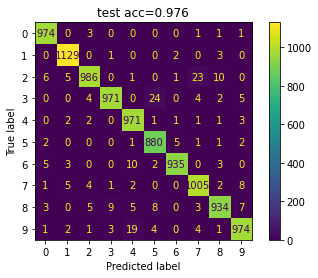

In [ ]:
# plot
cm = confusion_matrix(test_labels, test_labels_predicted, labels=np.arange(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.title('test acc='+str(round(np.sum(np.diagonal(conf_mat))/np.sum(conf_mat),3)))
plt.show()

### Why is high accuracy for this data helpful?

Recall [Alan Turing](https://en.wikipedia.org/wiki/Alan_Turing) and his [Turing Test](https://en.wikipedia.org/wiki/Turing_test).

The interpretation is that the high accuracy on test set means 
- the model does a great job at recognizing the patterns amongst different digits;
- the model can pass a Turing Test or that we are confident that the model can pass a Turing Test with high probability;

Hence, the conclusion is at this particular task (recognizing digits from images) the machine is at near-human level. 

# Convolutional Neural Networks

The benefit of using CNNs is their ability to develop an internal representation of a two-dimensional image . This allows the model to learn position and scale in variant structures in the data which is important when working with images. 

## Introduction

First, we introduce convolution operation. A convolution operation is like a matrix operation. It is defined as element-wise matrix multiplication.

$$
\underbrace{
\begin{bmatrix}
1 & 2 & 3 \\
3 & 4 & 5 \\
5 & 6 & 7 \\
\end{bmatrix}
}_\text{image}
⊗
\underbrace{
\begin{bmatrix}
1 & 0 \\
1 & 0 \\ 
\end{bmatrix}
}_\text{filter}
= 
\begin{bmatrix}
1 \times 1 + 0 + 3 \times 1 + 0 & 2 \times 1 + 0 + 4 \times 1 + 0 \\
3 \times 1 + 0 + 5 \times 1 + 0 & 4 \times 1 + 0 + 6 \times 1 + 0 \\
\end{bmatrix}
=
\begin{bmatrix}
4 & 6 \\
8 & 10 \\
\end{bmatrix}
$$

Next, we introduce pooling. There are two types of pooling: (1) average pooling, and (2) maximum pooling.

This is average pooling.
$$
\text{ave}\bigg(
\begin{bmatrix}
4 & 6 \\
8 & 10 \\
\end{bmatrix}
\bigg) = (4 + 6 + 8 + 10) \frac{1}{4} = 28/4 = 7
$$

This is maximum pooling.
$$
\text{max}\bigg(
\begin{bmatrix}
4 & 6 \\
8 & 10 \\
\end{bmatrix}
\bigg) = \max\{4, 6, 8, 10\} = 10
$$


In [ ]:
# create a small convolutional layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(1, (3,3), input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D())

# remark:
# This is a very simple model. Though it is called a model,
# it is actually not a neural network yet. Because there is 
# no dense layers yet. We just want to see what the Conv2D function
# does to the pictures.
# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 1)        0         
 )                                                               
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# before model fitting, let us just throw in 1 image
sample_output_before_fitting = model.predict(training_images[0].reshape((1, 28, 28, 1)))

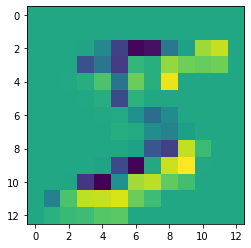

In [ ]:
# reshape
sample_output_2darray = sample_output_before_fitting.reshape((13, 13))
plt.imshow(sample_output_2darray)

In [ ]:
# build a CNN (Convolutional Neural Network) model
model = tf.keras.models.Sequential(name="MODEL_JohnSmith")
## Your Changes Start Here ##
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1), name="Conv_1"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', name="Conv_2"))
model.add(tf.keras.layers.MaxPooling2D()) 
# You can have more CONVOLUTIONAL layers! # <===== TRY TO TUNE THIS!!!
# Each convolutional layer can have arbitrary different number of units! # <===== TRY TO TUNE THIS!!!
# ... you can have however many you want
## Your Changes Ends Here ##
# up to here, we finish coding the convolutional layers, we have not done neural network layers

# build neural network layers
model.add(tf.keras.layers.Flatten()) # neural network requires the input layer to be a vector instead of 2D array
## Your Changes Start Here ##
model.add(tf.keras.layers.Dense(256, activation='relu', use_bias=True)) # input units (usually starts with 128) and activation (it's a choice, usually relu)
model.add(tf.keras.layers.Dense(128, activation='relu', use_bias=True)) # input units (usually starts with 128) and activation (it's a choice, usually relu)
# You can have more DENSE layers! # <===== TRY TO TUNE THIS!!!
# Each dense layer can have arbitrary different number of units! # <===== TRY TO TUNE THIS!!!
# ... you can have however many you want
## Your Changes Ends Here ##
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer or end layer | you have to match the number of classes
# summary
model.summary()

Model: "MODEL_JohnSmith"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 Conv_2 (Conv2D)             (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 256)           

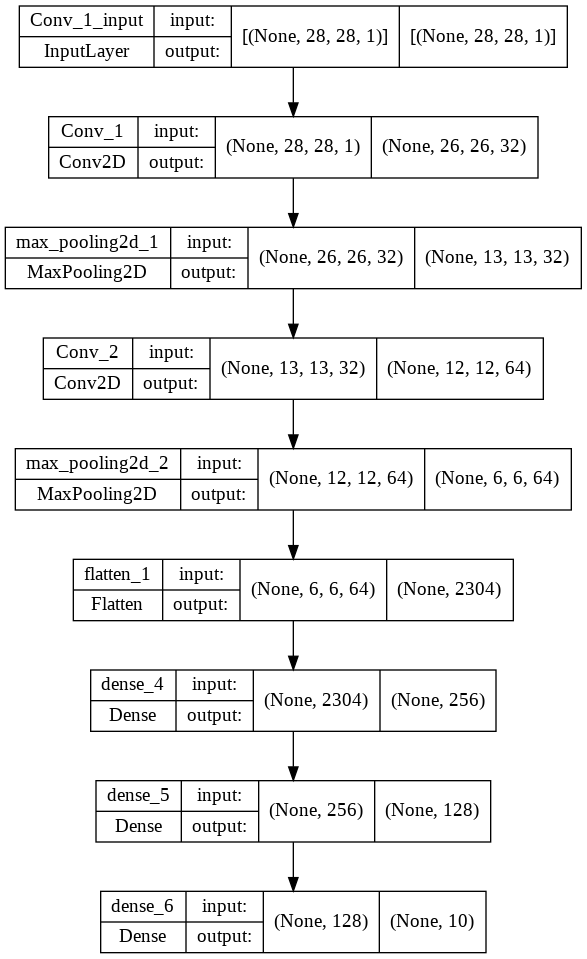

In [ ]:
# plot using a utility function
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True, show_layer_names=True)
# where is it? 
# This file, my_model.png, is under your Colab folder.
# Go to the left, click on the "Folder" button, and you should see this png file.

In [ ]:
# compile
model.compile(
    ## Your Changes Start Here ##
    # optimizer: https://keras.io/api/optimizers/
    # loss: https://keras.io/api/losses/
    optimizer="adam",
    loss="categorical_crossentropy",
    ## Your Changes Ends Here ##
    metrics=['accuracy']
)

In [ ]:
# load gpu
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# fit | we train the model here
# use GPU
with tf.device('/device:GPU:0'):
    history = model.fit(
        training_images, training_labels_one_hot_encoded,
        validation_split=0.2,
        ## Your Changes Start Here ##
        # there is a sweet spot, you don't want to overfit, but you also want to make sure your model learned something
        epochs=10
        ## Your Changes Ends Here ##
    )

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1569 - accuracy: 0.9514 - val_loss: 0.0606 - val_accuracy: 0.9830
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0481 - val_accuracy: 0.9868
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0553 - val_accuracy: 0.9840
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0757 - val_accuracy: 0.9781
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0202 - accuracy: 0.9939 - val_loss: 0.0533 - val_accuracy: 0.9867
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0432 - val_accuracy: 0.9900
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0612 - val_accuracy:

### Evaluation

In [ ]:
# quick evaluation on test set
this_final_loss_, this_final_acc_ = model.evaluate(test_images, test_labels_one_hot_encoded)
print('Test Result: Loss is '+str(this_final_loss_)+', and accuracy is '+str(this_final_acc_))

313/313 [==============================] - 1s 3ms/step - loss: 0.0500 - accuracy: 0.9884
Test Result: Loss is 0.049962837249040604, and accuracy is 0.9883999824523926


## Visualize Performance

Text(0.5, 1.0, 'loss')

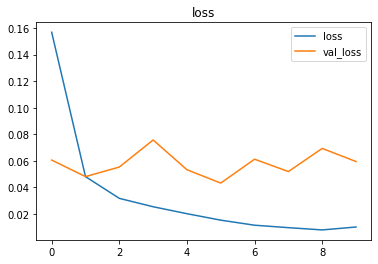

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

In [ ]:
# predict
test_labels_one_hot_encoded_predicted = model.predict(test_images)
test_labels_predicted = np.argmax(test_labels_one_hot_encoded_predicted, axis=1)
print(test_labels.shape)
print(test_labels_predicted.shape)

(10000,)
(10000,)


In [ ]:
# confusion matrix
conf_mat = metrics.confusion_matrix(y_true=test_labels, y_pred=test_labels_predicted)
conf_mat

array([[ 976,    1,    0,    0,    1,    0,    1,    1,    0,    0],
       [   0, 1132,    0,    0,    0,    0,    2,    0,    1,    0],
       [   1,    0, 1022,    0,    0,    0,    0,    6,    3,    0],
       [   0,    0,    0, 1004,    0,    2,    0,    1,    3,    0],
       [   0,    3,    1,    0,  964,    0,    3,    2,    5,    4],
       [   2,    0,    1,    7,    0,  875,    3,    0,    2,    2],
       [   3,    4,    0,    0,    1,    5,  944,    0,    1,    0],
       [   0,    3,    4,    2,    0,    0,    0, 1019,    0,    0],
       [   1,    0,    1,    0,    0,    0,    0,    0,  972,    0],
       [   0,    1,    1,    2,    6,    2,    0,   14,    7,  976]])

In [ ]:
# waht are the diagonals
np.diagonal(conf_mat)

array([ 976, 1132, 1022, 1004,  964,  875,  944, 1019,  972,  976])

In [ ]:
# sum of diagonal
np.sum(np.diagonal(conf_mat))

9884

In [ ]:
# sum of the matrix
np.sum(conf_mat)

10000

In [ ]:
# accuracy
np.sum(np.diagonal(conf_mat))/np.sum(conf_mat)

0.9884

In [ ]:
# quick way
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

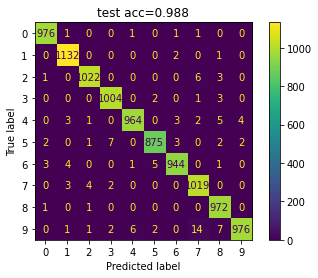

In [ ]:
# plot
cm = confusion_matrix(test_labels, test_labels_predicted, labels=np.arange(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot()
plt.title('test acc='+str(round(np.sum(np.diagonal(conf_mat))/np.sum(conf_mat),3)))
plt.show()

## Research Proposal

Research proposal is a guideline of what you want to do with your project. You should start with a topic title and a punchline of your project.

### Topic

This project designs a deep Convolutional Neural Network (CNN) to classify images into different labels. The goal is to see whether advanced AI models such as deep CNN can recognize the patterns in the images.

### Proposed Experiment

This project starts with a baseline model. This is a simple neural network, also known as Artificial Neural Network (ANN). An ANN has dense layers and the layers are formed using a linear combination (these are the neurons in the dense layers) and an activation function.

This project also investigates advanced models. This is a family of different Convolutional Neural Network (CNN). Models such as CNN are consist of convolutional layers. Give an example of a convolution operation.

### Expected Results

In a simple data such as MNIST Handwritten Digits, we expect baseline model to perform about 97% and advanced model to perform about 98%.

For example, from the above experiments attempted, we can summarize the following table.

| No. | Conv | Hidden | Performance |
| --- | ---  | ---    | ---         | 
| 1   | 0    | [256, 128, 64] | 98% |
| 2   | [32, 64] | [256, 128] | 99% |
| ... | ...  | ...    | ...   |

Can you detect a pattern here? If yes, how would you propose the next step?

### Future Work

This project will implement baseline model and advanced models on Chest X-ray image dataset. The project will build deep CNN model to help doctors to make diagnosis of lung cancer. 

In addition, optional work can be to investigate the explainability of the deep CNN models. CNN models, after tuning, can have high prediction performance. However, it requires additional work to help the doctors to explain how CNN work. This is the explainability side of the project that we can do if we have more time. 